# MODELOS

In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, LabelEncoder, OneHotEncoder, OrdinalEncoder
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, confusion_matrix
from sklearn import metrics
import xgboost
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline

In [72]:
df_mod = pd.read_csv("../data/dataset_proc.csv")
df_mod

,Pollutant_Concentration_mg_kg,Soil_pH,Temperature_C,Humidity_%,Rainfall_mm,Soil_Organic_Matter_%,Disease_Severity_enc,Region_Asia,Region_Europe,Region_North America,...,Age_Group_Affected_Children,Age_Group_Affected_Elderly,Gender_Most_Affected_Female,Gender_Most_Affected_Male,Mitigation_Measure_Community Awareness,Mitigation_Measure_Crop Rotation,Mitigation_Measure_Government Regulation,Mitigation_Measure_Soil Remediation,Case_Resolved_Yes,Follow_Up_Required_Yes
0,-0.441976,1.574682,0.830605,0.312685,-1.196646,-1.157151,1.0,True,False,False,...,False,False,False,True,False,False,True,False,False,True
1,-1.545950,1.283115,0.374386,0.696686,-1.666917,1.642384,0.0,False,True,False,...,False,True,False,False,True,False,False,False,True,False
2,1.155397,-0.955095,-1.073610,-1.143706,-0.682124,0.114048,2.0,False,True,False,...,True,False,False,False,False,False,False,True,True,False
3,-0.241790,-0.689254,0.414058,-1.298242,-0.723772,-0.432821,2.0,False,False,True,...,False,False,False,True,True,False,False,False,True,False
4,-0.157708,1.008698,-1.014104,0.017661,0.318287,-1.533803,1.0,True,False,False,...,True,False,True,False,False,False,True,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,-1.582803,0.511318,-1.480239,0.785661,0.132608,-1.008663,2.0,False,False,True,...,False,True,False,False,False,True,False,False,True,True
2996,0.133536,-1.058002,-0.181010,1.019808,-0.134631,-1.182503,2.0,False,False,False,...,False,False,True,False,False,False,True,False,True,False
2997,0.776492,-1.040851,0.850440,-0.104095,-0.163264,1.236760,0.0,True,False,False,...,True,False,True,False,False,False,True,False,False,False
2998,0.723360,-1.572533,-0.676899,1.268003,-1.674726,0.182860,0.0,False,False,True,...,False,False,True,False,False,False,False,True,True,True


In [73]:
bool_cols = df_mod.select_dtypes(include="bool").columns
df_mod[bool_cols] = df_mod[bool_cols].astype("int8")

In [70]:
y.value_counts(normalize=True)

Disease_Severity_enc
2.0    0.341000
1.0    0.332667
0.0    0.326333
Name: proportion, dtype: float64

In [74]:
df_mod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 64 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Pollutant_Concentration_mg_kg             3000 non-null   float64
 1   Soil_pH                                   3000 non-null   float64
 2   Temperature_C                             3000 non-null   float64
 3   Humidity_%                                3000 non-null   float64
 4   Rainfall_mm                               3000 non-null   float64
 5   Soil_Organic_Matter_%                     3000 non-null   float64
 6   Disease_Severity_enc                      3000 non-null   float64
 7   Region_Asia                               3000 non-null   int8   
 8   Region_Europe                             3000 non-null   int8   
 9   Region_North America                      3000 non-null   int8   
 10  Region_Oceania                      

In [102]:
df_mod

,Pollutant_Concentration_mg_kg,Soil_pH,Temperature_C,Humidity_%,Rainfall_mm,Soil_Organic_Matter_%,Disease_Severity_enc,Region_Asia,Region_Europe,Region_North America,...,Age_Group_Affected_Children,Age_Group_Affected_Elderly,Gender_Most_Affected_Female,Gender_Most_Affected_Male,Mitigation_Measure_Community Awareness,Mitigation_Measure_Crop Rotation,Mitigation_Measure_Government Regulation,Mitigation_Measure_Soil Remediation,Case_Resolved_Yes,Follow_Up_Required_Yes
0,-0.441976,1.574682,0.830605,0.312685,-1.196646,-1.157151,1.0,1,0,0,...,0,0,0,1,0,0,1,0,0,1
1,-1.545950,1.283115,0.374386,0.696686,-1.666917,1.642384,0.0,0,1,0,...,0,1,0,0,1,0,0,0,1,0
2,1.155397,-0.955095,-1.073610,-1.143706,-0.682124,0.114048,2.0,0,1,0,...,1,0,0,0,0,0,0,1,1,0
3,-0.241790,-0.689254,0.414058,-1.298242,-0.723772,-0.432821,2.0,0,0,1,...,0,0,0,1,1,0,0,0,1,0
4,-0.157708,1.008698,-1.014104,0.017661,0.318287,-1.533803,1.0,1,0,0,...,1,0,1,0,0,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,-1.582803,0.511318,-1.480239,0.785661,0.132608,-1.008663,2.0,0,0,1,...,0,1,0,0,0,1,0,0,1,1
2996,0.133536,-1.058002,-0.181010,1.019808,-0.134631,-1.182503,2.0,0,0,0,...,0,0,1,0,0,0,1,0,1,0
2997,0.776492,-1.040851,0.850440,-0.104095,-0.163264,1.236760,0.0,1,0,0,...,1,0,1,0,0,0,1,0,0,0
2998,0.723360,-1.572533,-0.676899,1.268003,-1.674726,0.182860,0.0,0,0,1,...,0,0,1,0,0,0,0,1,1,1


## Xtrain, y_train

In [75]:
X = df_mod.drop(columns="Disease_Severity_enc")
y = df_mod["Disease_Severity_enc"]

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X_top10, y, test_size=0.2, random_state=11)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(2400, 10)
(2400,)
(600, 10)
(600,)


In [77]:
y_train.value_counts(normalize=True)

Disease_Severity_enc
2.0    0.345833
1.0    0.335833
0.0    0.318333
Name: proportion, dtype: float64

## Random Forest Classifier

In [92]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators=200,
                                 max_depth=3, 
                                 max_features=3,
                                 max_leaf_nodes=16,
                                 random_state=42)
rnd_clf.fit(X_train, y_train)

y_pred_rf = rnd_clf.predict(X_test)
# np.sum(y_test == y_pred_rf) / len(y_test) 
print(accuracy_score(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))

0.32166666666666666
[[ 32  82 101]
 [ 34  53 105]
 [ 27  58 108]]


In [93]:
cr_rf = cross_val_score(rnd_clf, X, y, cv=10, scoring="accuracy")
print("muestras de validación: \n", cr_rf)
print("media: \n", cr_rf.mean())

muestras de validación: 
 [0.36666667 0.33333333 0.30333333 0.34       0.31       0.35666667
 0.35666667 0.32666667 0.29666667 0.33      ]
media: 
 0.332


In [98]:
rf = RandomForestClassifier(random_state=42) 

parametros = {
    "n_estimators": [100, 200, 300],        # suficiente número de árboles
    "max_depth": [None, 5, 10],             # None permite crecer hasta que no haya más hojas
    "max_features": ["sqrt", "log2", 0.5],  # sqrt/log2 son buenas prácticas, 0.5 = mitad de features
    "max_leaf_nodes": [None, 10, 20]        # None = sin límite, 10-20 = controlar complejidad
}

grid = GridSearchCV(rf, param_grid=parametros, cv=5, scoring="accuracy", verbose=3)

grid.fit(X_train, y_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
[CV 1/5] END max_depth=None, max_features=sqrt, max_leaf_nodes=None, n_estimators=100;, score=0.360 total time=   0.9s
[CV 2/5] END max_depth=None, max_features=sqrt, max_leaf_nodes=None, n_estimators=100;, score=0.312 total time=   0.7s
[CV 3/5] END max_depth=None, max_features=sqrt, max_leaf_nodes=None, n_estimators=100;, score=0.379 total time=   0.7s
[CV 4/5] END max_depth=None, max_features=sqrt, max_leaf_nodes=None, n_estimators=100;, score=0.306 total time=   0.7s
[CV 5/5] END max_depth=None, max_features=sqrt, max_leaf_nodes=None, n_estimators=100;, score=0.342 total time=   0.7s
[CV 1/5] END max_depth=None, max_features=sqrt, max_leaf_nodes=None, n_estimators=200;, score=0.377 total time=   1.6s
[CV 2/5] END max_depth=None, max_features=sqrt, max_leaf_nodes=None, n_estimators=200;, score=0.312 total time=   1.6s
[CV 3/5] END max_depth=None, max_features=sqrt, max_leaf_nodes=None, n_estimators=200;, score=0.356 total

,estimator,RandomForestC...ndom_state=42)
,param_grid,"{'max_depth': [None, 5, ...], 'max_features': ['sqrt', 'log2', ...], 'max_leaf_nodes': [None, 10, ...], 'n_estimators': [100, 200, ...]}"
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,5
,verbose,3
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,100


In [99]:
print(grid.best_estimator_)
print(grid.best_score_)

RandomForestClassifier(max_depth=5, max_leaf_nodes=10, random_state=42)
0.36


In [20]:
importances = rnd_clf.feature_importances_
importances

array([0.08493491, 0.08301829, 0.08344066, 0.0846673 , 0.10384261,
       0.08622797, 0.00644224, 0.00541109, 0.00640262, 0.0079023 ,
       0.0040295 , 0.00608678, 0.00411742, 0.00569402, 0.00892351,
       0.00672576, 0.0043155 , 0.00547061, 0.00563741, 0.00555295,
       0.01056366, 0.00649511, 0.00562975, 0.00512747, 0.00765355,
       0.00867098, 0.00628699, 0.00682939, 0.0291454 , 0.00666463,
       0.00913866, 0.00981469, 0.00939051, 0.00794374, 0.00593957,
       0.00732958, 0.00603094, 0.00823297, 0.00691814, 0.00978354,
       0.0115466 , 0.00735865, 0.00596847, 0.01361143, 0.01241533,
       0.00652662, 0.01018141, 0.0104497 , 0.01702595, 0.01157887,
       0.00584227, 0.02206149, 0.00840579, 0.00715612, 0.00601306,
       0.00982273, 0.00832929, 0.00663124, 0.00979462, 0.00662083,
       0.0058705 , 0.00614813, 0.0082082 ])

<Figure size 1500x1000 with 0 Axes>

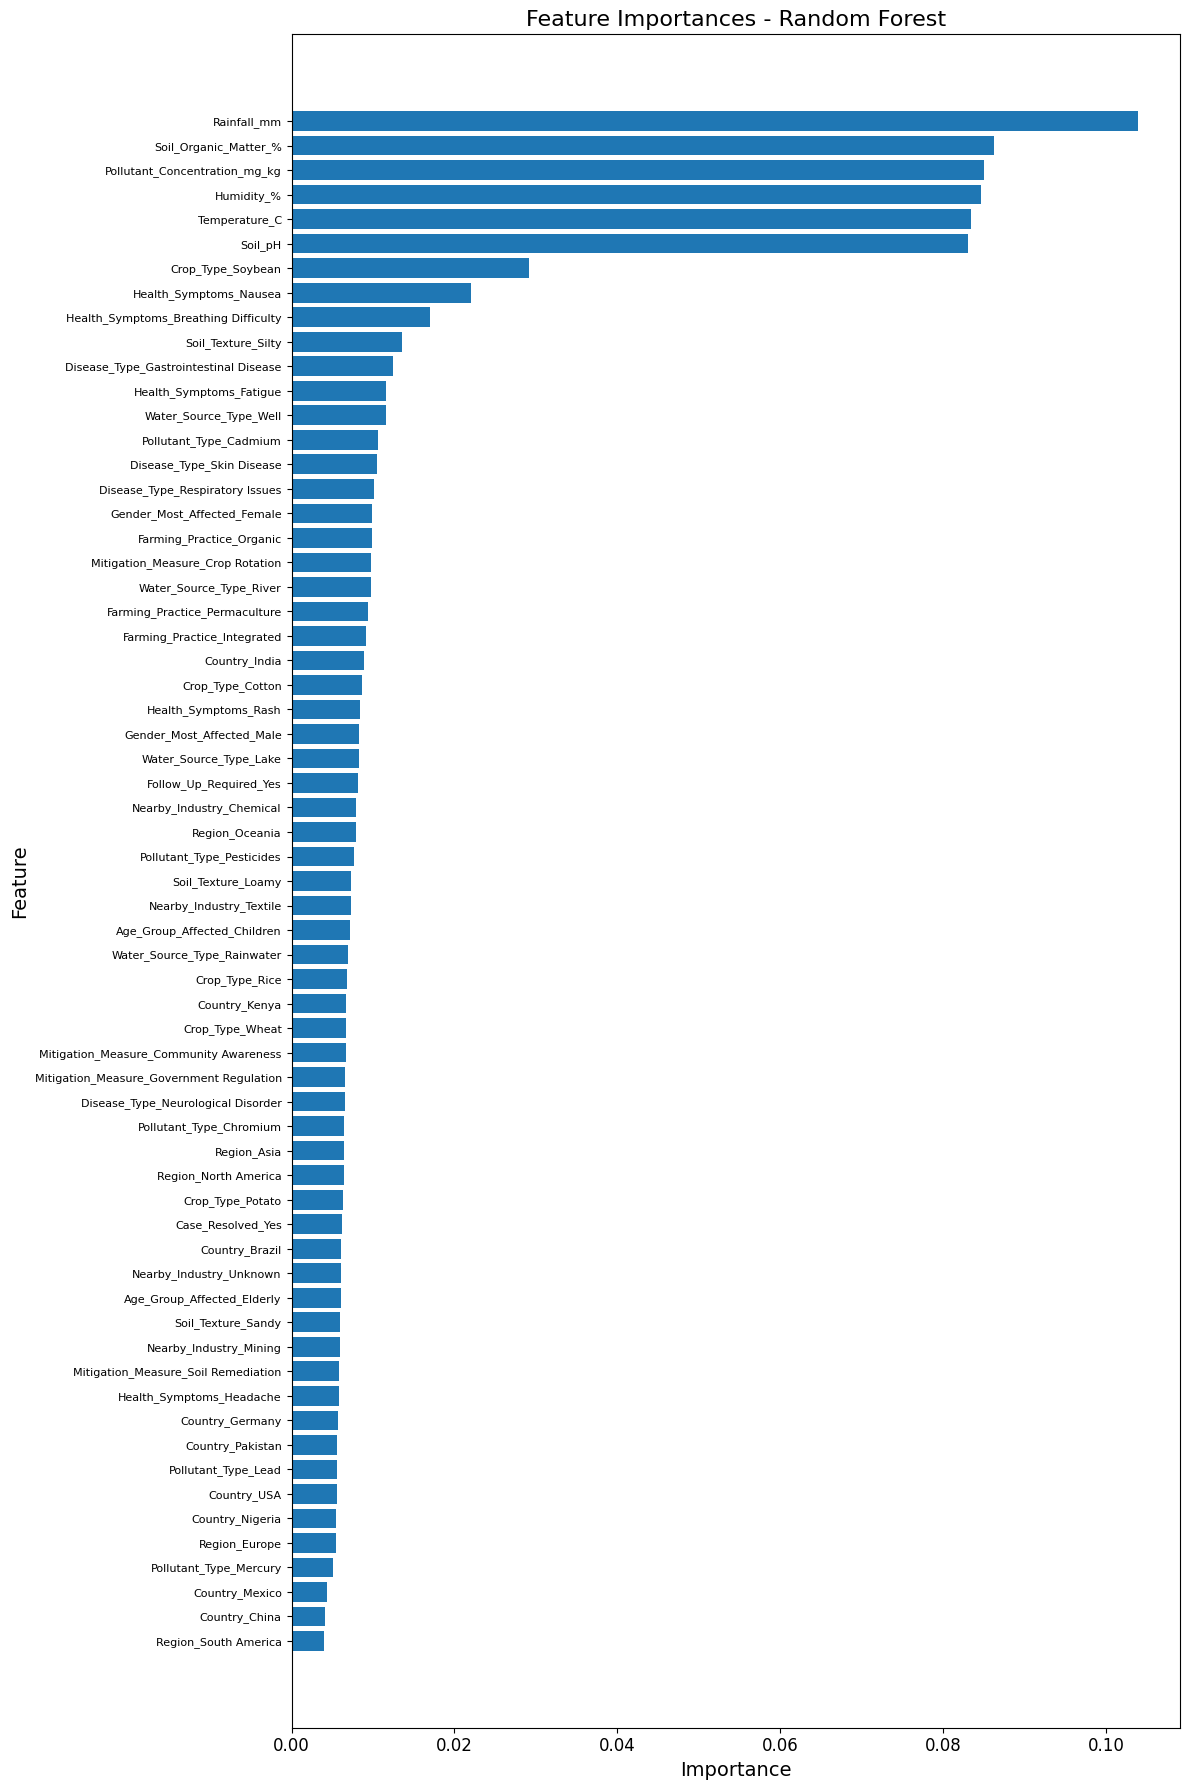

In [30]:
plt.figure(figsize=(15, 10))
df_feature_importance = pd.DataFrame({
    "feature": X.columns,
    "importance": rnd_clf.feature_importances_
})
df_feature_importance = df_feature_importance.sort_values(by="importance", ascending=False)
plt.figure(figsize=(12, 18))  # aumenta la altura si son muchas features

df_feature_importance = pd.DataFrame({
    "feature": X.columns,
    "importance": rnd_clf.feature_importances_
})

df_feature_importance = df_feature_importance.sort_values(
    by="importance", ascending=False
)

plt.barh(
    df_feature_importance["feature"],
    df_feature_importance["importance"]
)

plt.gca().invert_yaxis()
plt.title("Feature Importances - Random Forest", fontsize=16)
plt.xlabel("Importance", fontsize=14)
plt.ylabel("Feature", fontsize=14)

plt.xticks(fontsize=12)
plt.yticks(fontsize=8)   # <--- aquí se ajusta lo pequeño que lo quieres

plt.subplots_adjust(left=0.35)  # deja espacio para los labels largos
plt.tight_layout()
plt.show()

## Random Forest Regressor

## XGBoost

In [80]:
xgb_clas = xgboost.XGBClassifier(random_state=42)

xgb_clas.fit(X_train, y_train)
y_pred_xgb= xgb_clas.predict(X_test)

print(accuracy_score(y_test, y_pred_xgb))
print(confusion_matrix(y_test, y_pred_xgb))

0.33666666666666667
[[60 78 77]
 [60 69 63]
 [58 62 73]]


# Prueba de varios de modelos con pipeline

In [ ]:
# Creamos la base, creamos un objeto pipe
pipe = Pipeline(steps=[("scaler", StandardScaler()),
    ('classifier', svm.SVC())
])

logistic_params = {
    'classifier': [LogisticRegression(max_iter=1000, solver='liblinear'), LogisticRegression(max_iter=10, solver='liblinear')],
    'classifier__penalty': ['l1', 'l2']
}

random_forest_params = {
    'scaler': [StandardScaler(), MinMaxScaler(), None],
    'classifier': [RandomForestClassifier()],
    'classifier__max_depth': [2,3]
}

svm_param = {
    'classifier': [svm.SVC()],
    'classifier__C': [0.001, 0.1, 0.5, 1, 5, 10, 100],
}

# empaquetamos todos los parámetros de los modelos
search_space = [
    logistic_params,
    random_forest_params,
    svm_param
]

clf = GridSearchCV(estimator = pipe,
                  param_grid = search_space,
                  cv = 5,
                  verbose=3,
                  n_jobs=-1)

clf.fit(X_train, y_train)

In [101]:
# SVM con kernel polinómico directamente
svm_poly_clf = SVC(kernel="poly", degree=2, C=10, gamma='scale', coef0=1)

# Entrenar
svm_poly_clf.fit(X_train, y_train)

# Predecir y evaluar
y_pred = svm_poly_clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.32666666666666666
Confusion Matrix:
 [[52 89 74]
 [60 75 57]
 [46 78 69]]


In [105]:
svm_pipeline = Pipeline([
    ('svm', SVC(C=10, kernel='rbf', gamma='scale', class_weight='balanced', random_state=42))
])

# Entrenamiento
svm_pipeline.fit(X_train, y_train)

# Predicciones
y_pred = svm_pipeline.predict(X_test)

# Métricas
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.36
Confusion Matrix:
 [[75 76 64]
 [55 80 57]
 [65 67 61]]


In [106]:
from sklearn.model_selection import cross_val_score
from sklearn.dummy import DummyClassifier

dummy = DummyClassifier(strategy="most_frequent")
print(cross_val_score(dummy, X, y, cv=10).mean())

0.341


In [107]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

pipeline = Pipeline([
    ("remove_low_variance", VarianceThreshold(threshold=0.01)),   
    ("select_best", SelectKBest(score_func=f_classif, k=20)),    
    ("pca", PCA(n_components=10)),                              
    ("svm", SVC(kernel='rbf', C=10, gamma='scale', class_weight='balanced'))
])

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.32
Confusion Matrix:
 [[74 52 70]
 [66 57 77]
 [86 57 61]]


In [108]:
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.dummy import DummyClassifier

dummy = DummyClassifier(strategy="most_frequent")
print("Dummy:", cross_val_score(dummy, X, y, cv=10).mean())

Dummy: 0.341


In [109]:
from sklearn.inspection import permutation_importance
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X, y)

perm = permutation_importance(rf, X, y, n_repeats=10, random_state=42)
print(perm.importances_mean[:20])


[0.00000000e+00 0.00000000e+00 3.33333333e-05 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]


In [110]:
from sklearn.feature_selection import mutual_info_classif

mi = mutual_info_classif(X, y, random_state=42)
print(mi.max())


0.03643779848141904
